**MUSIC GENRE CLASSIFICATION**
   
Authors: Aayush Sagar, Naveen US, Hari Varsha V    
Objective: To apply PCA and K-Means clustering     
Input: Dataset     
Output: Accuracy

CA2

In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('music_samples.csv')
dataset.head(5)


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0


In [ ]:
cols = dataset.columns.tolist()
cols.insert(0, cols.pop(cols.index('label')))
dataset = dataset.reindex(columns= cols)
X = dataset.iloc[:,1:59].values
y = dataset.iloc[:,0].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
#Finding Co-variance matrix of actual dataset
data = pd.DataFrame(X_std)
covMatrix=pd.DataFrame.cov(data)
covMatrix=np.round(covMatrix, decimals=2)

print("\nCo-variance matrix of actual dataset after normalization\n",covMatrix)


Co-variance matrix of actual dataset after normalization
      0     1     2     3     4     5     6     7     8     9   ...    48  \
0   0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1   0.0  1.00 -0.44  0.42  0.24  0.53  0.25  0.46  0.10  0.53  ...  0.23   
2   0.0 -0.44  1.00 -0.08  0.25 -0.21  0.28 -0.03  0.29 -0.14  ... -0.22   
3   0.0  0.42 -0.08  1.00  0.55  0.47  0.24  0.50  0.09  0.50  ...  0.06   
4   0.0  0.24  0.25  0.55  1.00  0.33  0.51  0.38  0.29  0.35  ... -0.06   
5   0.0  0.53 -0.21  0.47  0.33  1.00  0.48  0.89  0.02  0.97  ...  0.12   
6   0.0  0.25  0.28  0.24  0.51  0.48  1.00  0.56  0.61  0.49  ... -0.13   
7   0.0  0.46 -0.03  0.50  0.38  0.89  0.56  1.00  0.22  0.95  ...  0.01   
8   0.0  0.10  0.29  0.09  0.29  0.02  0.61  0.22  1.00  0.07  ... -0.18   
9   0.0  0.53 -0.14  0.50  0.35  0.97  0.49  0.95  0.07  1.00  ...  0.10   
10  0.0  0.14  0.33  0.16  0.38  0.17  0.78  0.41  0.89  0.24  ... -0.19   
11  0.0  0.46 -0.39  0.29  0.

Text(0.5, 1.0, 'Covariance between different features')

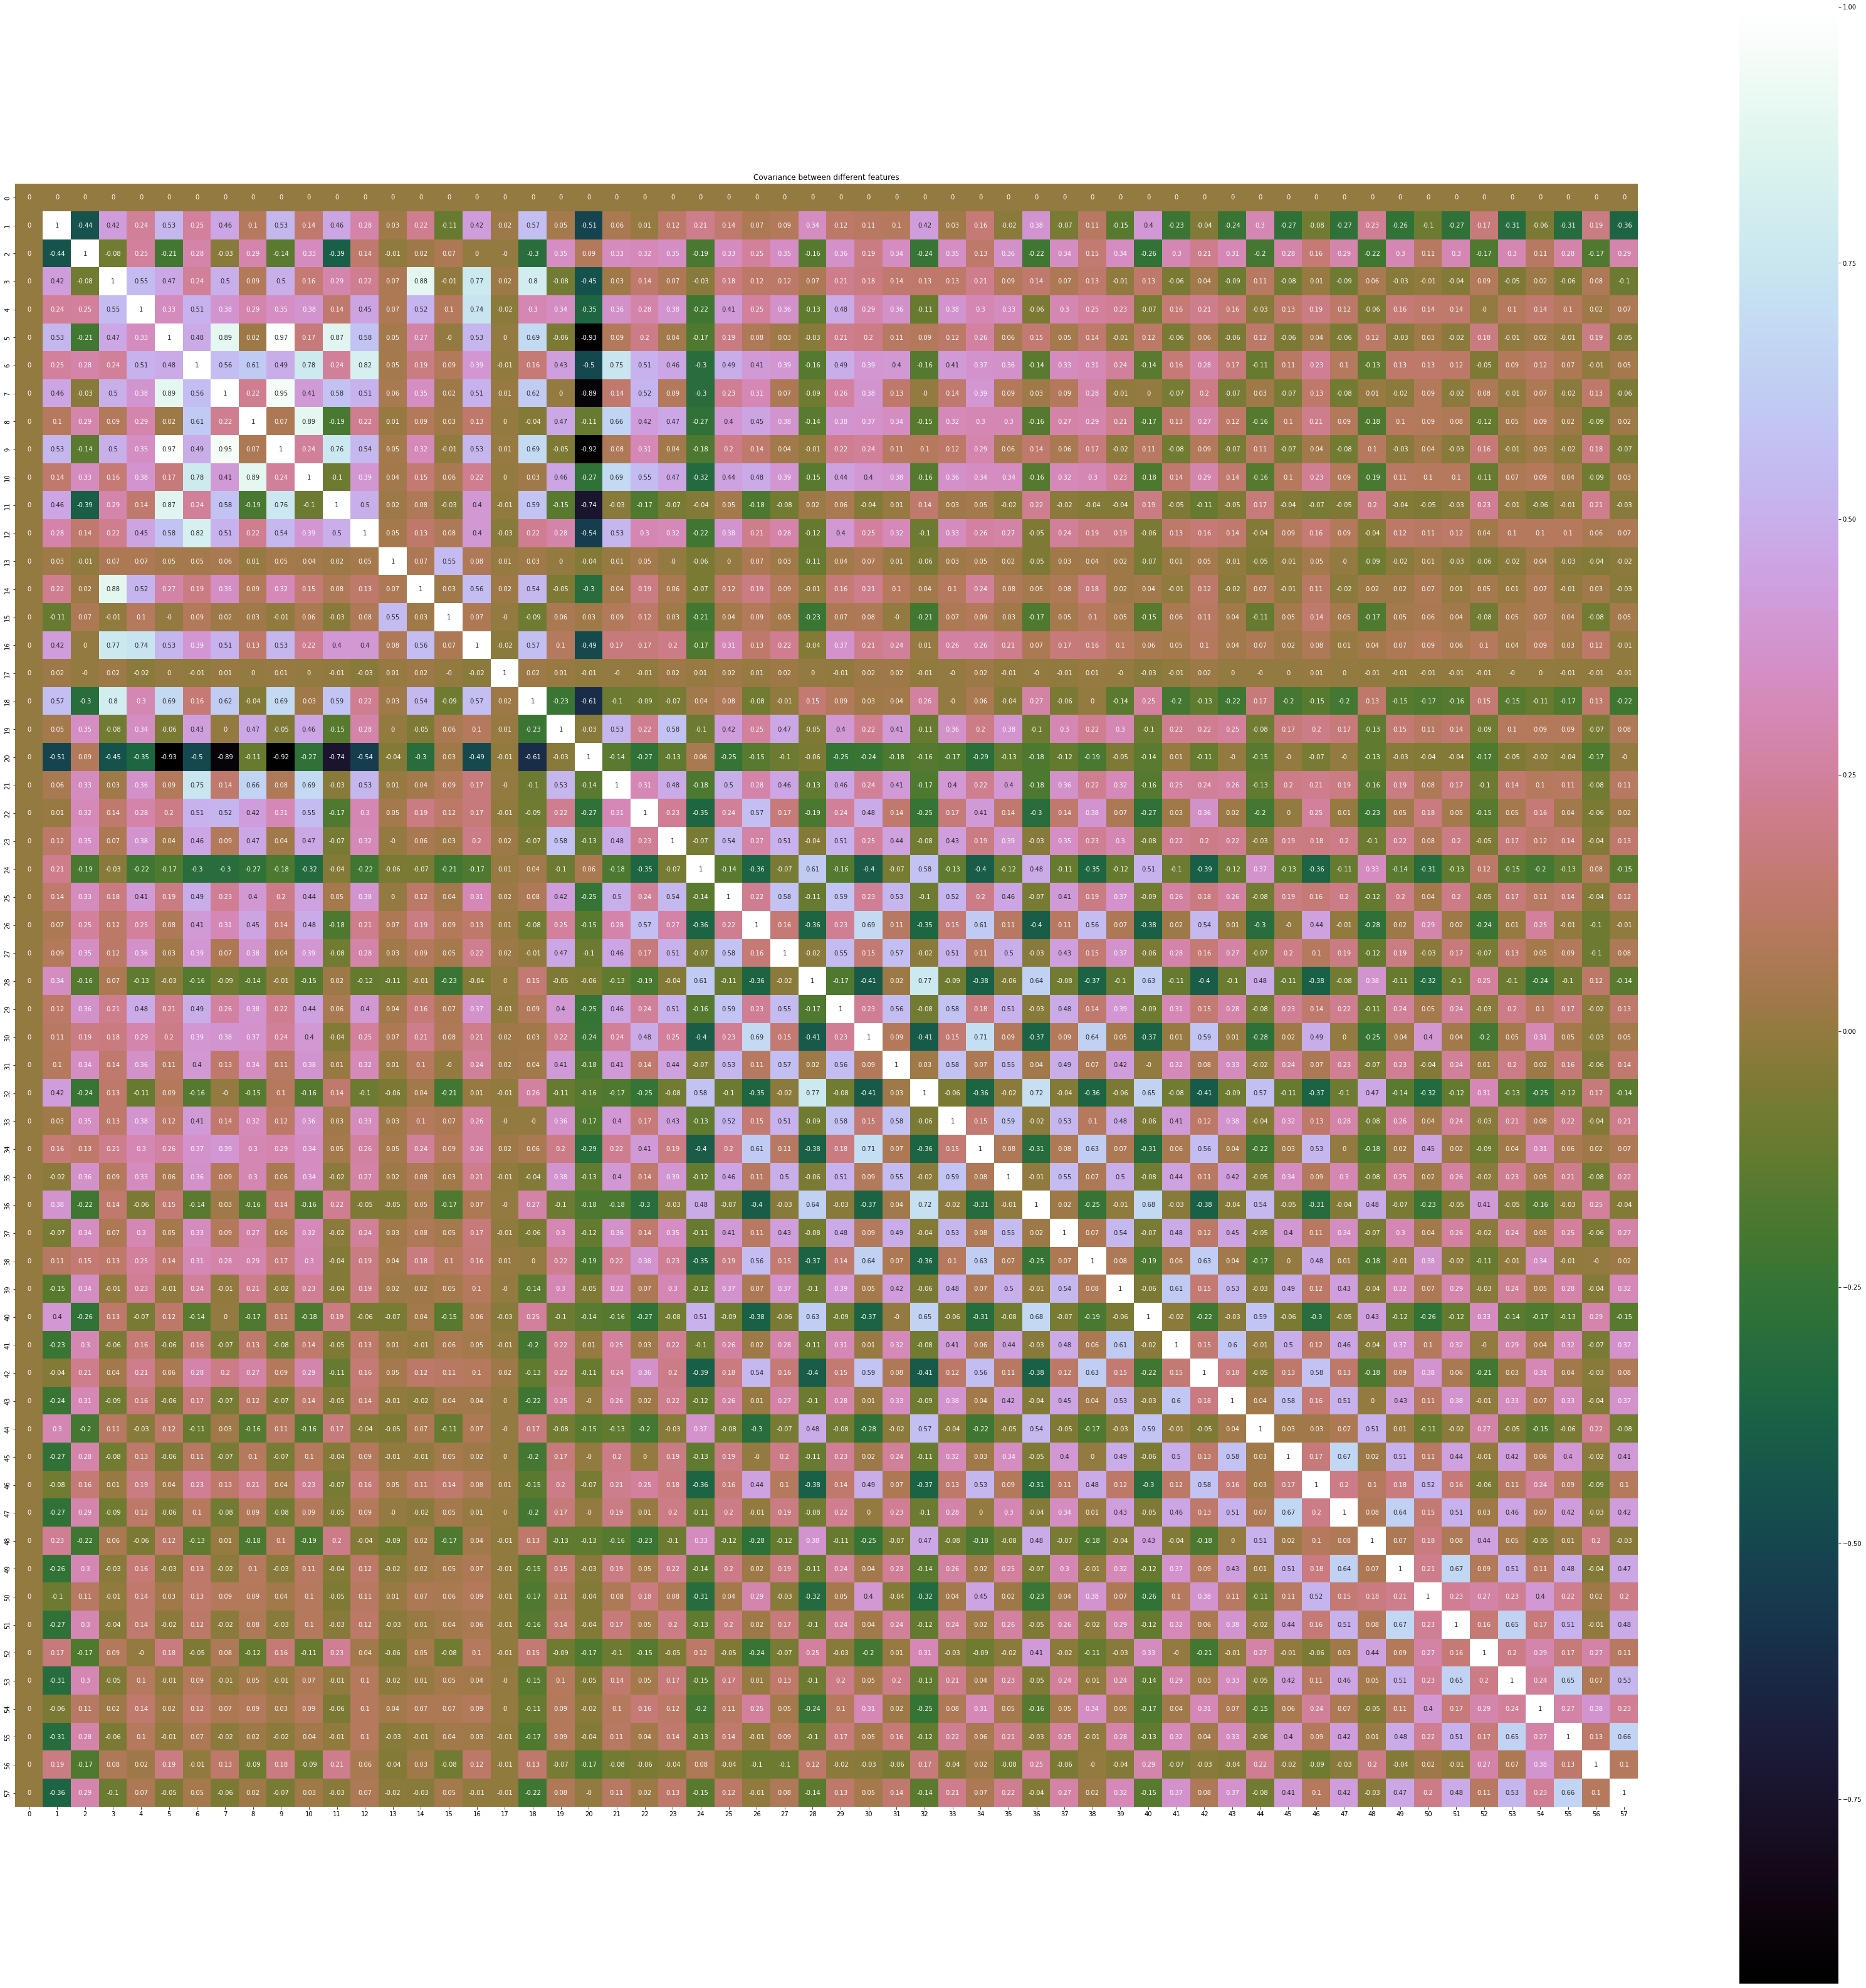

In [ ]:
import seaborn as sns
plt.figure(figsize=(58,58))
sns.heatmap(covMatrix, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Covariance between different features')

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(covMatrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.          0.          0.         ...  0.          0.
   1.        ]
 [-0.01085409  0.27966744  0.0141295  ...  0.00726114 -0.07511056
   0.        ]
 [-0.14625596 -0.14898455  0.04462647 ...  0.15776689 -0.15613246
   0.        ]
 ...
 [-0.09155678 -0.10639622  0.14098028 ... -0.01168182  0.12998387
   0.        ]
 [ 0.0186369   0.09058497  0.05793939 ... -0.10315841  0.08035949
   0.        ]
 [-0.08819064 -0.12538107  0.12995034 ...  0.00838401 -0.0053148
   0.        ]]

Eigenvalues 
[1.14229517e+01 7.72275973e+00 5.89736407e+00 3.75969252e+00
 2.48752010e+00 2.09365023e+00 1.68501391e+00 1.51363860e+00
 1.43054219e+00 1.22005260e+00 1.05794669e+00 9.93506315e-01
 9.70156630e-01 8.46588631e-01 7.74195395e-01 6.70581746e-01
 6.37889716e-01 6.14520040e-01 1.16266684e-03 4.50521943e-03
 8.89535206e-03 3.61425840e-02 5.14140681e-02 6.42899843e-02
 1.08382313e-01 5.56539279e-01 1.45750501e-01 5.21600738e-01
 1.64340114e-01 4.99132980e-01 1.80923039e-01 1.93651640e-01
 

In [ ]:
for i in range(len(eig_vals)):
  temp = eig_vals[i]
  if temp<1:
    print (i)

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


In [ ]:
d=pd.DataFrame(eig_vecs)
d=d.drop([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57], axis = 1)
d.shape

(58, 11)

In [ ]:
#PCA algorithm
a = np.asarray(d)
a=np.transpose(a)
data_modd=np.transpose(X_std) #Finding the transpose of the actual dataset 
res=np.dot (a, data_modd) #Dot - product
data=np.transpose(res) #Assigning the transpose of the result value to the new variable #updated dataset after removing insignificant features
data=pd.DataFrame(data) #Converting into new dataset with the help of DataFrame
print("The new dataset after removing insignificant features")
data.head()
data.shape

The new dataset after removing insignificant features


(9990, 11)

In [ ]:
#Finding Co-variance matrix of actual dataset
data1 = pd.DataFrame(X_std)
covMatrix1=pd.DataFrame.cov(data1)
covMatrix1=np.round(covMatrix1, decimals=2)
print("\nCo-variance matrix of actual dataset after normalization\n",covMatrix1)
covMatrix1.shape


Co-variance matrix of actual dataset after normalization
      0     1     2     3     4     5     6     7     8     9   ...    48  \
0   0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1   0.0  1.00 -0.44  0.42  0.24  0.53  0.25  0.46  0.10  0.53  ...  0.23   
2   0.0 -0.44  1.00 -0.08  0.25 -0.21  0.28 -0.03  0.29 -0.14  ... -0.22   
3   0.0  0.42 -0.08  1.00  0.55  0.47  0.24  0.50  0.09  0.50  ...  0.06   
4   0.0  0.24  0.25  0.55  1.00  0.33  0.51  0.38  0.29  0.35  ... -0.06   
5   0.0  0.53 -0.21  0.47  0.33  1.00  0.48  0.89  0.02  0.97  ...  0.12   
6   0.0  0.25  0.28  0.24  0.51  0.48  1.00  0.56  0.61  0.49  ... -0.13   
7   0.0  0.46 -0.03  0.50  0.38  0.89  0.56  1.00  0.22  0.95  ...  0.01   
8   0.0  0.10  0.29  0.09  0.29  0.02  0.61  0.22  1.00  0.07  ... -0.18   
9   0.0  0.53 -0.14  0.50  0.35  0.97  0.49  0.95  0.07  1.00  ...  0.10   
10  0.0  0.14  0.33  0.16  0.38  0.17  0.78  0.41  0.89  0.24  ... -0.19   
11  0.0  0.46 -0.39  0.29  0.

(58, 58)

In [ ]:
sum=0
for i in range(len (covMatrix1)):
  for j in range(len (covMatrix1)):
    if i>j:
      sum += covMatrix1[i][j]
    sum-round (sum, 2)
print("Sum of upper triangle covariance matrix before PCA :", sum)

Sum of upper triangle covariance matrix before PCA : 170.87999999999997


In [ ]:
#Finding Co-variance matrix of actual dataset
data = pd.DataFrame(data)
covMatrix=pd.DataFrame.cov(data)
covMatrix=np.round(covMatrix, decimals=2)
print("\nCo-variance matrix of actual dataset after normalization\n",covMatrix)
covMatrix.shape


Co-variance matrix of actual dataset after normalization
        0     1     2     3     4     5     6     7     8     9     10
0   11.43  0.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00  0.01
1    0.00  7.72  0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.01  0.00
2   -0.00  0.00  5.90  0.00  0.00 -0.01  0.00 -0.00  0.00 -0.00 -0.00
3   -0.00  0.00  0.00  3.76 -0.00  0.00 -0.00 -0.01  0.00 -0.01 -0.00
4    0.00 -0.00  0.00 -0.00  2.48 -0.01  0.00  0.00  0.00 -0.00  0.00
5   -0.00  0.00 -0.01  0.00 -0.01  2.10  0.00  0.00  0.00  0.00  0.00
6    0.00 -0.00  0.00 -0.00  0.00  0.00  1.68  0.00  0.00  0.00 -0.00
7   -0.00 -0.00 -0.00 -0.01  0.00  0.00  0.00  1.51  0.00  0.00 -0.00
8   -0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.42  0.00 -0.00
9    0.00 -0.01 -0.00 -0.01 -0.00  0.00  0.00  0.00  0.00  1.22 -0.00
10   0.01  0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00  1.06


(11, 11)

In [ ]:
sum1=0
for i in range(len (covMatrix)):
  for j in range(len (covMatrix)):
    if i>j:
      sum1 += covMatrix[i][j]
    sum1-round (sum1, 2)
print("Sum of upper triangle covariance matrix after PCA :", sum1)

Sum of upper triangle covariance matrix after PCA : -0.04


K Means Clustering





In [ ]:
#K-Means model with two clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(data)
kmeans.cluster_centers_
kmeans.inertia_

327094.1444743024

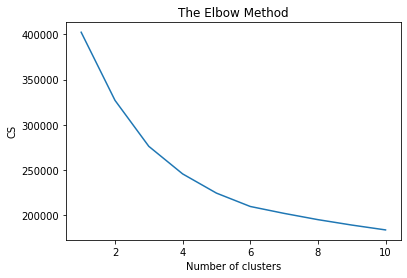

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(data)
labels = kmeans.labels_

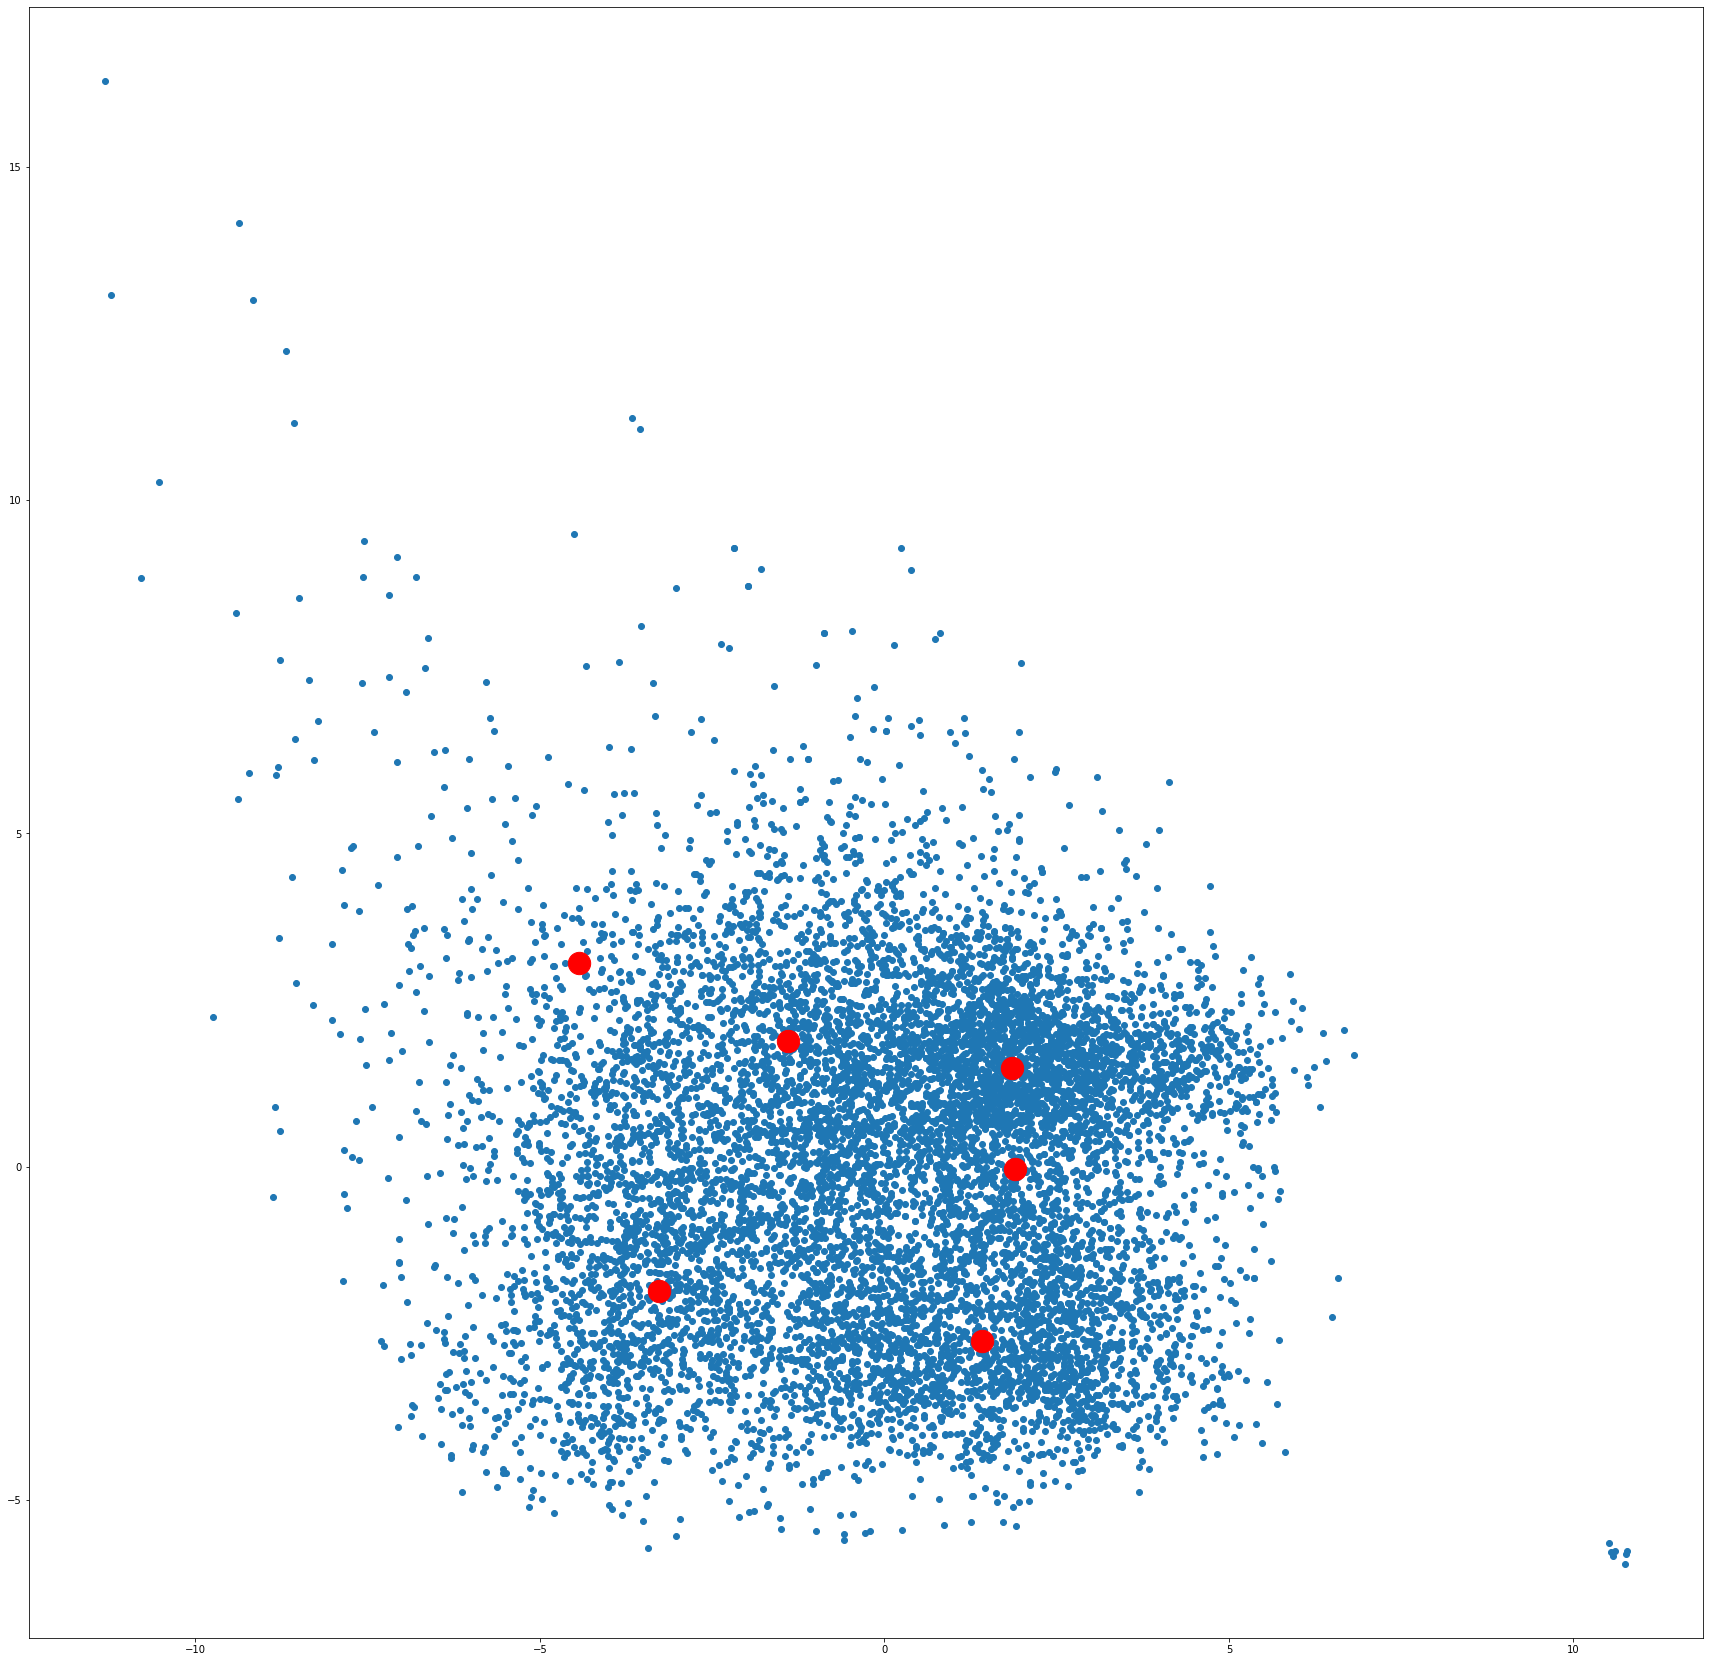

In [ ]:
plt.figure(figsize=(30,30))
plt.scatter(data[1], data[2])
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=500, c='red')
plt.show()

Optimal K value using Silhouette algorithm

In [ ]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(data).labels_
    score = metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.19917714634535774
Silhouette score for k(clusters) = 4 is 0.20350306830513312
Silhouette score for k(clusters) = 5 is 0.21050556456444933
Silhouette score for k(clusters) = 6 is 0.21468768647843395
Silhouette score for k(clusters) = 7 is 0.1665354059090207
Silhouette score for k(clusters) = 8 is 0.14772112366370566
Silhouette score for k(clusters) = 9 is 0.14414638157583776
Silhouette score for k(clusters) = 10 is 0.1425089138113267
Silhouette score for k(clusters) = 11 is 0.13441458072570267
Silhouette score for k(clusters) = 12 is 0.13989401140389154


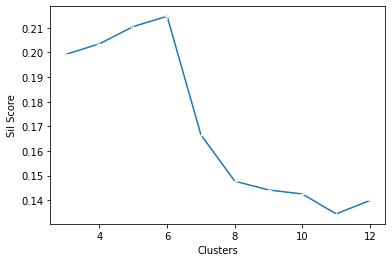

In [ ]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")